<a href="https://colab.research.google.com/github/Vakhranev/Heritage/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BF%D0%BE%D0%B2%D1%82%D0%BE%D1%80%D0%BE%D0%B2%20%D0%BA%D0%BE%D0%BB%D0%BB%D0%BE%D0%BA%D0%B0%D1%86%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

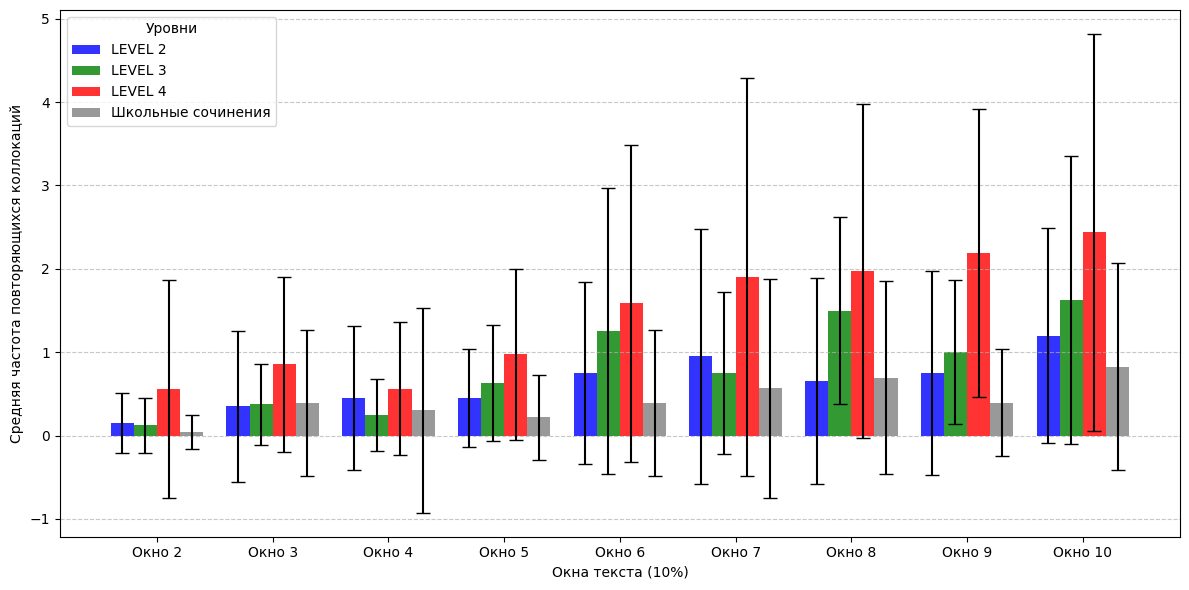

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Функции для обработки текста
def split_into_windows(text, num_windows=10):
    tokens = text.split()
    window_size = max(1, len(tokens) // num_windows)
    return [tokens[i * window_size:(i + 1) * window_size] for i in range(num_windows)]

def count_repeated_collocations(windows):
    seen_collocations = set()
    repeated_counts = []

    for window in windows:
        window_bigrams = [f"{window[i]} {window[i+1]}" for i in range(len(window) - 1)]
        repeated_count = sum(1 for bigram in window_bigrams if bigram in seen_collocations)
        repeated_counts.append(repeated_count)
        seen_collocations.update(window_bigrams)
    return repeated_counts

# Чтение данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as f:
    america_texts = json.load(f)

with open('updated_final_school.json', 'r', encoding='utf-8') as f:
    lib_texts = json.load(f)

with open('files_by_levels.txt', 'r', encoding='utf-8') as f:
    files_by_levels = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
    current_level = None
    for line in f:
        line = line.strip()
        if line.startswith('LEVEL'):
            current_level = line
        elif line and current_level:
            files_by_levels[current_level].append(line)

# Анализ данных
def analyze_by_level(files, data, num_windows=10):
    all_repeated = []

    for file in files:
        if file in data:
            text = data[file]['text']
            windows = split_into_windows(text, num_windows)
            repeated = count_repeated_collocations(windows)
            all_repeated.append(repeated)

    if not all_repeated:
        return np.zeros(num_windows), np.zeros(num_windows)

    repeated_array = np.array(all_repeated)
    means = np.mean(repeated_array, axis=0)
    std_devs = np.std(repeated_array, axis=0)

    return means, std_devs

# Сбор данных по уровням
num_windows = 10
repeated_results = {}
std_devs_results = {}

for level, files in files_by_levels.items():
    means, std_devs = analyze_by_level(files, america_texts, num_windows)
    repeated_results[level] = means
    std_devs_results[level] = std_devs

lib_repeated, lib_std_devs = analyze_by_level(lib_texts.keys(), lib_texts, num_windows)

# Построение графика
levels = list(repeated_results.keys()) + ["Школьные сочинения"]
colors = ["blue", "green", "red", "gray"]

# Создаем группированные столбцы
x = np.arange(2, num_windows + 1)  # Позиции окон, начиная с 2
bar_width = 0.2  # Ширина столбцов
offset = np.linspace(-0.3, 0.3, len(levels))  # Смещение для каждого уровня

plt.figure(figsize=(12, 6))

for i, level in enumerate(levels):
    if level == "Школьные сочинения":
        means, std_devs = lib_repeated[1:], lib_std_devs[1:]  # Исключаем первое окно
    else:
        means, std_devs = repeated_results[level][1:], std_devs_results[level][1:]  # Исключаем первое окно

    # Рисуем столбцы
    plt.bar(
        x + offset[i],
        means,
        bar_width,
        yerr=std_devs,
        capsize=5,
        label=level,
        color=colors[i],
        alpha=0.8
    )

# Настройка осей и легенды
plt.xticks(x, [f"Окно {i}" for i in x])  # Метки на оси X, начиная с 2
plt.xlabel("Окна текста (10%)")
plt.ylabel("Средняя частота повторяющихся коллокаций")
plt.legend(title="Уровни")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig('Рис. 7. Среднее распределение повторяющихся коллокаций по текстам.jpg', dpi=300)
plt.show()

In [ ]:
import json
import numpy as np

# Функция для вычисления длины окна в биграммах
def calculate_bigram_window_size(text, num_windows=10):
    tokens = text.split()  # Разделение текста на токены
    window_size = len(tokens) // num_windows  # Длина окна в токенах
    bigram_window_size = window_size - 1  # Количество биграмм
    return bigram_window_size, len(tokens)

# Функция для подсчета повторяющихся коллокаций в окне
def count_repeated_collocations(windows):
    seen_collocations = set()
    repeated_counts = []

    for window in windows:
        window_bigrams = [f"{window[i]} {window[i+1]}" for i in range(len(window) - 1)]
        repeated_count = sum(1 for bigram in window_bigrams if bigram in seen_collocations)
        repeated_counts.append(repeated_count)
        seen_collocations.update(window_bigrams)

    return repeated_counts

# Чтение данных
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as f:
    america_texts = json.load(f)

with open('final_school.json', 'r', encoding='utf-8') as f:
    lib_texts = json.load(f)

with open('files_by_levels.txt', 'r', encoding='utf-8') as f:
    files_by_levels = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
    current_level = None
    for line in f:
        line = line.strip()
        if line.startswith('LEVEL'):
            current_level = line
        elif line and current_level:
            files_by_levels[current_level].append(line)

# Функция для анализа текста по уровням
def analyze_by_level(files, data, num_windows=10):
    level_bigram_size = []
    level_repeated_percentage = {i: [] for i in range(1, num_windows + 1)}

    for file in files:
        if file in data:
            text = data[file]['text']
            bigram_window_size, total_tokens = calculate_bigram_window_size(text, num_windows)
            windows = [text.split()[i*bigram_window_size:(i+1)*bigram_window_size] for i in range(len(text.split()) // bigram_window_size)]
            repeated_collocations = count_repeated_collocations(windows)

            # Считаем процент повторяющихся коллокаций для каждого окна
            total_bigrams = bigram_window_size * len(windows)
            for i in range(num_windows):
                if total_bigrams > 0:
                    level_repeated_percentage[i + 1].append(repeated_collocations[i] / bigram_window_size * 100)

            level_bigram_size.append(bigram_window_size)

    # Средний размер окна и процент повторяющихся коллокаций для каждого окна
    avg_bigram_size = np.mean(level_bigram_size)
    avg_repeated_percentage = {i: np.mean(level_repeated_percentage[i]) for i in range(1, num_windows + 1)}

    return avg_bigram_size, avg_repeated_percentage

# Анализ данных по уровням и художественным текстам
num_windows = 10
levels_results = {}
lib_results = {}

for level, files in files_by_levels.items():
    avg_bigram_size, avg_repeated_percentage = analyze_by_level(files, america_texts, num_windows)
    levels_results[level] = (avg_bigram_size, avg_repeated_percentage)

lib_avg_bigram_size, lib_avg_repeated_percentage = analyze_by_level(lib_texts.keys(), lib_texts, num_windows)
lib_results = (lib_avg_bigram_size, lib_avg_repeated_percentage)

# Вывод статистики
for level, (avg_bigram_size, avg_repeated_percentage) in levels_results.items():
    print(f"{level}")
    print(f"Средний размер окна — {avg_bigram_size:.2f} коллокаций")
    for i in range(1, num_windows + 1):
        print(f"Среднее количество повторяющихся коллокаций окна №{i} — {avg_repeated_percentage[i]:.2f}%")

print("L1 literary texts")
print(f"Средний размер окна — {lib_avg_bigram_size:.2f} коллокаций")
for i in range(1, num_windows + 1):
    print(f"Среднее количество повторяющихся коллокаций окна №{i} — {lib_avg_repeated_percentage[i]:.2f}%")

LEVEL 2
Средний размер окна — 15.00 коллокаций
Среднее количество повторяющихся коллокаций окна №1 — 0.00%
Среднее количество повторяющихся коллокаций окна №2 — 0.53%
Среднее количество повторяющихся коллокаций окна №3 — 2.39%
Среднее количество повторяющихся коллокаций окна №4 — 1.43%
Среднее количество повторяющихся коллокаций окна №5 — 3.43%
Среднее количество повторяющихся коллокаций окна №6 — 4.34%
Среднее количество повторяющихся коллокаций окна №7 — 4.63%
Среднее количество повторяющихся коллокаций окна №8 — 4.64%
Среднее количество повторяющихся коллокаций окна №9 — 5.47%
Среднее количество повторяющихся коллокаций окна №10 — 4.49%
LEVEL 3
Средний размер окна — 17.62 коллокаций
Среднее количество повторяющихся коллокаций окна №1 — 0.00%
Среднее количество повторяющихся коллокаций окна №2 — 1.04%
Среднее количество повторяющихся коллокаций окна №3 — 2.06%
Среднее количество повторяющихся коллокаций окна №4 — 2.44%
Среднее количество повторяющихся коллокаций окна №5 — 2.44%
Средн